1. Preprocessing & Tokenization amharic data
2. Tokenization
3. Building N-grams ( 1-3)
4. Frequency Analysis - Print top 10 in each gram and visalise using wordclouds
5. N-gram Sentence Generation - generate sentences from bigram and trigram models
6. Evaluation & Perplexity - Calculate preplexity of the models
7. Unknown Token Handling (Optional)


In [2]:
import re

In [48]:
# remove punctuation
def remove_punc(text):
  # Ethiopic punctuation set
  ethiopic_punct = "፠፡።፣፤፥፦፧፨"
  # Remove all punctuation (ASCII + Ethiopic)
  no_punct_text = re.sub(f"[{ethiopic_punct}!?,;:]", "", text)
  return no_punct_text

def remove_stop_words(text, stop_word_drive_path = "/Users/nahom/Library/CloudStorage/GoogleDrive-nahomgarefo@gmail.com/My Drive/datasets/amstopwords.txt"):
  stop_words = []
  with open(stop_word_drive_path, "r") as f:
    stop_words = f.read().splitlines()
  no_stop_text = [w for w in text if w not in stop_words]
  return no_stop_text

def amaharic_preprocessing(text):

  # remove punctation
  no_punc_text = remove_punc(text)

  # tokenize based on words
  tokens = no_punc_text.split()
  
  # remove stop words
  tokens = remove_stop_words(tokens)

  return tokens

## upload dataset from drive

In [3]:
data_set_file_path = "/Users/nahom/Library/CloudStorage/GoogleDrive-nahomgarefo@gmail.com/My Drive/datasets/Cleaned_GPAC.txt"
with open(data_set_file_path, "r") as f:
  data = f.read()



In [ ]:
data = data[: len(data) // 2]  # take first 1/2 to reduce memory as the kernel kept crashing
tokens = amaharic_preprocessing(data)

## extracting and building N-grams

In [64]:
from collections import defaultdict

def get_n_grams(tokens, n):
    grams = []
    for i in range(len(tokens)-n+1):
        grams.append(tuple(tokens[i:i+n]))
    return grams

## count frequencies

In [65]:
from collections import Counter

unigrams = get_n_grams(tokens, 1)
bigrams = get_n_grams(tokens, 2)
trigrams = get_n_grams(tokens, 3)

In [66]:
unigram_counts = Counter(unigrams)
bigram_counts  = Counter(bigrams)
trigram_counts = Counter(trigrams)

print("\nUnigram counts:", unigram_counts.most_common(10))
print("Bigram counts:", bigram_counts.most_common(10))
print("Trigram counts:", trigram_counts.most_common(10))




Unigram counts: [(('ሀሁ',), 45), (('ዘመን',), 38), (('ዓመት',), 38), (('ፀጋዬ',), 35), (('ወር',), 31), (('መድረክ',), 31), (('ወልደጊዮርጊስ',), 30), (('አዲስ',), 29), (('ሥራ',), 28), (('ደራሲ',), 27)]
Bigram counts: [(('ብላታ', 'ወልደጊዮርጊስ'), 25), (('በስድስት', 'ወር'), 25), (('ተስፋዬ', 'ገብረአብ'), 24), (('ሀሁ', 'በስድስት'), 20), (('አዲስ', 'አበባ'), 15), (('ከበደ', 'ሚካኤል'), 15), (('ሀሁ', 'ፐፑ'), 15), (('ወ', 'ሮ'), 15), (('ቤተ', 'መንግሥት'), 12), (('ሚሊዮን', 'ዶላር'), 12)]
Trigram counts: [(('ሀሁ', 'በስድስት', 'ወር'), 20), (('በብርሃንና', 'ሰላም', 'ማተሚያ'), 10), (('ብርሃኑ', 'ዘሪሁን', 'ፀጋዬ'), 10), (('እናት', 'ዓለም', 'ጠኑ'), 10), (('ከፖለቲካ', 'ያገኛቸው', 'ክብር'), 8), (('ያገኛቸው', 'ክብር', 'ተሰሚነት'), 8), (('ግርማ', 'ሞገስ', 'ተከባሪነት'), 8), (('ወ', 'ሮ', 'አለሚቱ'), 8), (('ወ', 'ሮ', 'ትዕግስት'), 6), (('ተስፋዬ', 'ገብረአብ', 'እንደጠቢቡ'), 5)]


In [12]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 549.3 kB/s eta 0:00:00a 0:00:01


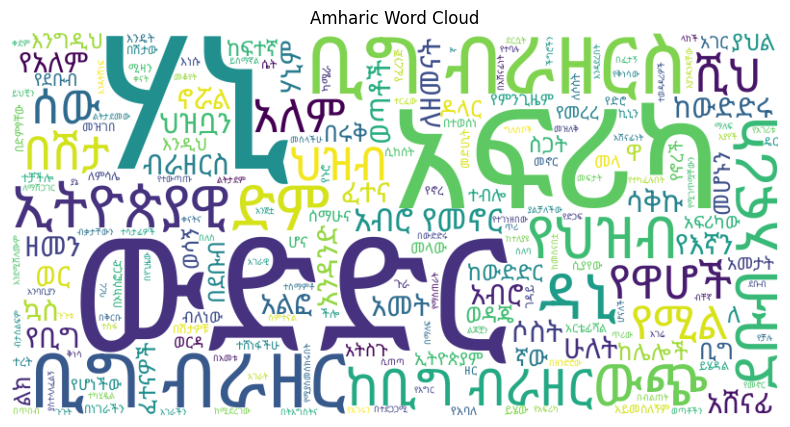

In [67]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

FONT_PATH = "/Users/nahom/Downloads/Noto_Sans_Ethiopic/NotoSansEthiopic-VariableFont.ttf"
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=FONT_PATH).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Join tokens back to text for wordcloud
clean_text = " ".join(tokens[:1000])
plot_wordcloud(clean_text, "Amharic Word Cloud")

## Generate Sentences

In [68]:
import random

def generate_sentence(start_word, n, model_counts):
    sentence = [start_word]
    for _ in range(10):
        context = tuple(sentence[-(n-1):]) if n > 1 else None

        candidates = [(gram, freq) for gram, freq in model_counts.items()
                      if (n == 1 or gram[:-1] == context)]

        if not candidates:
            break

        total = sum(freq for _, freq in candidates)
        probs = [freq/total for _, freq in candidates]

        chosen = random.choices([gram for gram,_ in candidates], probs)[0]
        sentence.append(chosen[-1])

    return " ".join(sentence)

In [72]:
print("\nGenerated sentence (Bigram):")
print(generate_sentence("ዓመት", 2, bigram_counts))


Generated sentence (Bigram):
ዓመት በማስመልከት ጭምር እንደተዘጋጀ ለማወቅ የምንሞክረው አውቀን የተፈጠርን አይደለንም አውቀን ብንፈጠርስ


In [79]:
print("\nGenerated sentence (Trigram):")
print(generate_sentence("ብንፈጠርስ", 3, trigram_counts))


Generated sentence (Trigram):
ብንፈጠርስ


## Testing with perplexity

In [77]:
import math

def compute_perplexity(tokens, n, model_counts, lower_counts):
    ngrams = get_n_grams(tokens, n)
    log_prob_sum = 0
    valid_count = 0

    for g in ngrams:
        if model_counts[g] > 0:
            if n == 1:
                prob = model_counts[g] / sum(model_counts.values())
            else:
                prob = model_counts[g] / lower_counts[g[:-1]]

            log_prob_sum += -math.log2(prob)
            valid_count += 1

    if valid_count == 0:
        return float('inf')

    return 2 ** (log_prob_sum / valid_count)

# Split corpus for train/test
train_tokens = tokens[:-7]
test_tokens  = tokens[-7:]

In [78]:
print("\nPerplexity (Unigram):", compute_perplexity(test_tokens, 1, unigram_counts, None))
print("Perplexity (Bigram):", compute_perplexity(test_tokens, 2, bigram_counts, unigram_counts))
print("Perplexity (Trigram):", compute_perplexity(test_tokens, 3, trigram_counts, bigram_counts))


Perplexity (Unigram): 11145.958254789257
Perplexity (Bigram): 1.2009369551760027
Perplexity (Trigram): 1.0
